# <center> **AWS SaaS Sales Analysis**</center>

**Capstone Project 2**:  AWS SaaS Sales Dataset (Purwadhika) Data Science Program-2704. Here, I identified various problems related to the business needs and challenges of the company. This project focuses on data analysis, where I took on the role of a data analyst within the organization.
<div style="text-align: right;">
    by: Kerin A (2024)
</div>

***

**Contents**
<br>
1. Background
2. Problem Statement
3. Data
<br>
3.1. Setup Data
<br>
3.2. Data Exploration
<br>
3.3. Data Cleaning
<br>
3.4. Data Review
4. Data Analysis
<br>
4.1. Tracking Profitability Analysis
<br>
4.2. Sales & Profit Analysis
<br>
4.3. RFM Analysis
6. Final Summarization
<br>
5.1. Conclusion
<br>
5.2. Recommendation

***
## **1. Background**

The AWS SaaS Sales Dataset provides comprehensive data related to the sales, transactions, and performance of Software as a Service (SaaS) products. This dataset includes information on sales transactions, discounts, profit margins, products, regions, and other variables that offer valuable insights into the company’s overall performance. For businesses operating in the SaaS industry, understanding the factors that drive revenue and profitability is crucial to making informed decisions.

As businesses continue to scale and expand, the ability to analyze and optimize sales strategies can significantly enhance profitability. The following problem statements are identified to leverage the available data and offer actionable insights to improve decision-making within the company.

***
## **2. Problem Statement**

1. **Tracking Profitability:** How Did the High-Profit Customers from the Earliest Years Perform Over the Following Years?
2. **Sales & Profit Patterns:** How Do Sales and Profit Behave Quarterly Over All Years?
3. **RFM:** How Does RFM Analysis Help Us Create More Strategic and Segmented Customer Treatment?

***
## **3. Data**


This dataset contains transaction data from a fictitious SaaS company selling sales and marketing software to other companies (B2B). In the dataset, each row represents a single transaction/order (9,994 transactions), and the columns include:


| Column       | Description                                              |
|--------------|----------------------------------------------------------|
| Row ID       | A unique identifier for each transaction.                |
| Order ID     | A unique identifier for each order.                      |
| Order Date   | The date when the order was placed.                      |
| Date Key     | A numerical representation of the order date (YYYYMMDD). |
| Contact Name | The name of the person who placed the order.             |
| Country      | The country where the order was placed.                  |
| City         | The city where the order was placed.                     |
| Region       | The region where the order was placed.                   |
| Subregion    | The subregion where the order was placed.                |
| Customer     | The name of the company that placed the order.           |
| Customer ID  | A unique identifier for each customer.                   |
| Industry     | The industry the customer belongs to.                    |
| Segment      | The customer segment (SMB, Strategic, Enterprise, etc.). |
| Product      | The product was ordered.                                 |
| License      | The license key for the product.                         |
| Sales        | The total sales amount for the transaction.              |
| Quantity     | The total number of items in the transaction.            |
| Discount     | The discount applied to the transaction.                 |
| Profit       | The profit from the transaction.                         | 



### 3.1. Setup Data

**Import Libraries**

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify

import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [65]:
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


### 3.2. Data Exploration

**Data Check**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

The dtype includes: float64, int64, and object

With **19 columns** and **9994 rows**

**Change & Check Period Range of the Dataset**

In [71]:
# change Order Date data type from object into datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# call for the earliest and the latest date
datasetDate = df.sort_values(by='Order Date')
display(datasetDate[['Order Date']].head(1))
display(datasetDate[['Order Date']].tail(1))

,Order Date
7980,2020-01-04


,Order Date
906,2023-12-31


The range of the data is from **2020-01-04** until **2023-12-31**

**Check for duplicated value**

In [74]:
print(f'There are {df.duplicated().sum()} rows with duplicated values')

There are 0 rows with duplicated values


**Check for unique value**

In [76]:
print(f'There are {df.nunique()} unique rows')

There are Row ID          9994
Order ID        5009
Order Date      1237
Date Key        1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Customer ID       99
Industry          10
Segment            3
Product           14
License         9994
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64 unique rows


**Data Description**

In [78]:
df.drop(columns=['Row ID', 'Order Date']).describe().T

,count,mean,std,min,25%,50%,75%,max
Date Key,9994.0,2.021803e+07,11238.975964,2.020010e+07,2.021052e+07,2.022063e+07,2.023052e+07,2.023123e+07
Customer ID,9994.0,1.049772e+03,29.719388,1.001000e+03,1.024000e+03,1.049000e+03,1.076000e+03,1.101000e+03
Sales,9994.0,2.298580e+02,623.245101,4.440000e-01,1.728000e+01,5.449000e+01,2.099400e+02,2.263848e+04
Quantity,9994.0,3.789574e+00,2.225110,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.400000e+01
Discount,9994.0,1.562027e-01,0.206452,0.000000e+00,0.000000e+00,2.000000e-01,2.000000e-01,8.000000e-01
Profit,9994.0,2.865690e+01,234.260108,-6.599978e+03,1.728750e+00,8.666500e+00,2.936400e+01,8.399976e+03


### **3.3. Data Cleaning**

**Missing Values**

In [81]:
df.isnull().any()

Row ID          False
Order ID        False
Order Date      False
Date Key        False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

There is no missing value in this dataset. So, there's no need to do any treatment for missing value

**Duplicate**

In [84]:
df.duplicated().any()

False

There is no duplicated data in this dataset. So, there's no need to do any treatment

**Redundant Columns**

In [87]:
df = df.drop(columns=['Row ID'])
df = df.drop(columns=['Customer ID'])
df = df.drop(columns=['Date Key'])
df = df.drop(columns=['Contact Name'])

Row ID: It doesn't provide any analytical value.
Customer ID: We already have 'Customer' columns, so we don't need to use Customer ID.


Date KeyMinimize redundant because we already have the column 'Order Date't.

Contact Name: Personal info is not necessary as we will not analyze it by individual contacts (AWS SaaS is a B2B businel value.

**Check Outliers**

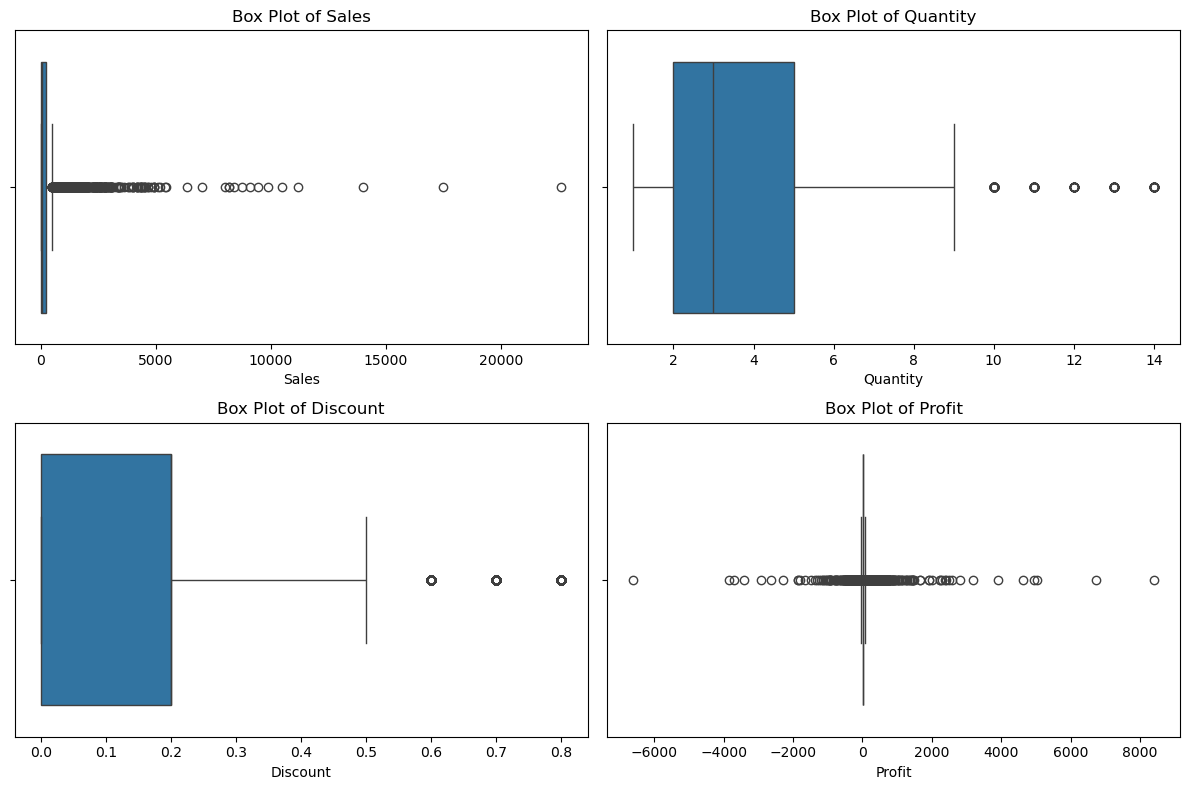

In [90]:
# Define the columns to check for outliers
columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Create the box plots for each column
plt.figure(figsize=(12, 8))

# Iterate through each column and plot a box plot
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each column
    sns.boxplot(x=df[col])  # Create the box plot
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

# Display the plot
plt.tight_layout()
plt.show()

**`Conclusion from Outliers:`**

Sales:
The high number of sales outliers indicates there are several transactions with exceptionally high sales values. These could represent bulk orders or high-value transactions.

Quantity:
The presence of outliers in the quantity data suggests some transactions involve unusually large quantities. This could point to bulk purchasing behavior by certain customers.

Discount:
The outliers in discounts indicate that a few transactions involved unusually high discounts. These might be special promotions or discounts provided to specific customer segments.

Profit:
The significant number of profit outliers, both positive and negative, indicates there are transactions with exceptionally high and low profit margins. This variability could be due to factors such as special pricing, high discount rates, or high-cost items.

**Identifying the outlier by calculating the Q1, Q3, IQR, lower and upper whisker to get the number of outliers**

In [101]:
col_num = ['Sales', 'Quantity', 'Discount', 'Profit']

lower_whisker = {}
upper_whisker = {}

# Calculate Q1, Q3, and IQR for each column
Q1 = df[col_num].quantile(0.25)
Q3 = df[col_num].quantile(0.75)
IQR = Q3 - Q1

for col in col_num:
    lower_whisker[col] = Q1[col] - 1.5 * IQR[col]
    upper_whisker[col] = Q3[col] + 1.5 * IQR[col]

print('Result Q1:')
display(Q1)

print('Result Q3:')
display(Q3)

print('Result IQR:')
display(IQR)

print('Lower Whisker:')
display(lower_whisker)

print('Upper Whisker:')
display(upper_whisker)

Result Q1:


Sales       17.28000
Quantity     2.00000
Discount     0.00000
Profit       1.72875
Name: 0.25, dtype: float64

Result Q3:


Sales       209.940
Quantity      5.000
Discount      0.200
Profit       29.364
Name: 0.75, dtype: float64

Result IQR:


Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64

Lower Whisker:


{'Sales': -271.71000000000004,
 'Quantity': -2.5,
 'Discount': -0.30000000000000004,
 'Profit': -39.724125}

Upper Whisker:


{'Sales': 498.93, 'Quantity': 9.5, 'Discount': 0.5, 'Profit': 70.816875}

**Check whether we need to drop Outliers or not**

In [104]:
# Count outliers for each column
outliers_count = {}

for col in columns:
    # Identify the outliers
    outliers = df[(df[col] < lower_whisker[col]) | (df[col] > upper_whisker[col])]
    outliers_count[col] = outliers.shape[0]  # Count the number of outliers

# Display the number of outliers for each column
print('Number of outliers for each column:')
display(outliers_count)

Number of outliers for each column:


{'Sales': 1167, 'Quantity': 170, 'Discount': 856, 'Profit': 1881}

**`Reasons to Keep Outliers:`**

- Reflects Reality: Outliers often represent real data points that capture extreme but genuine events. Removing them could lead to a less accurate representation of your dataset.

- Valuable Insights: Outliers can provide unique insights into rare but significant phenomena that might be important for this analysis.

- Diverse Customer Behavior: In customer analysis, outliers might highlight diverse behaviors, such as high-value customers or unique purchasing patterns.

- Risk and Opportunity: Outliers can help in identifying risks and opportunities that are not evident in the majority of the data.

## 3.4. Data Review

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order ID    9994 non-null   object        
 1   Order Date  9994 non-null   datetime64[ns]
 2   Country     9994 non-null   object        
 3   City        9994 non-null   object        
 4   Region      9994 non-null   object        
 5   Subregion   9994 non-null   object        
 6   Customer    9994 non-null   object        
 7   Industry    9994 non-null   object        
 8   Segment     9994 non-null   object        
 9   Product     9994 non-null   object        
 10  License     9994 non-null   object        
 11  Sales       9994 non-null   float64       
 12  Quantity    9994 non-null   int64         
 13  Discount    9994 non-null   float64       
 14  Profit      9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 1.1

In [110]:
df.head(5)

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [112]:
# export to csv
# df.to_csv(r"SaaS_Sales_Clean.csv", index=False)

***
## **4. Data Analysis**

### 4.1. Tracking Profitability Analysis
How Did the High-Profit Customers from the Earliest Years Perform Over the Following Years?

**Top 5 High-Profit Customers in the year of 2020**

In [117]:
# Extract the year from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year

# Filter the data for the year 2020
df_2020 = df[df['Year'] == 2020]

# Group by 'Customer' and calculate Total Profit for 2020
customer_profitability_2020 = df_2020.groupby('Customer').agg(
    Total_Profit=('Profit', 'sum')
).reset_index()

# Get the top 5 customers based on total profit in 2020
top_customers_2020 = customer_profitability_2020.nlargest(5, 'Total_Profit')[['Customer']]

# Display the top 5 customers in the desired format
print("Top 5 High Profit Customers in 2020:")
for idx, row in top_customers_2020.iterrows():
    print(f"{idx + 1}. {row['Customer']}")

Top 5 High Profit Customers in 2020:
11. Anthem
54. Johnson & Johnson
52. Itochu
98. Walt Disney
39. Ford Motor


**Analyze how they evolved over time (Quarterly)**

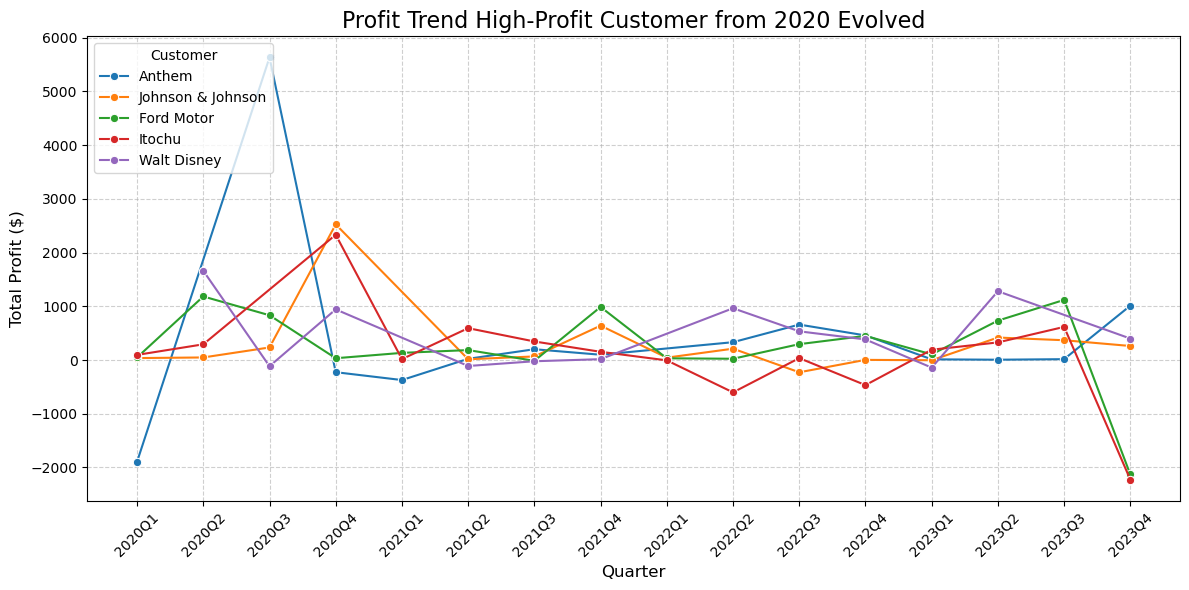

In [120]:
# Extract the quarter from 'Order Date'
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# Define the top 5 customers in 2020
top_customers = ['Anthem', 'Johnson & Johnson', 'Itochu', 'Walt Disney', 'Ford Motor']

# Filter the original data to include only the top customers
df_top_customers = df[df['Customer'].isin(top_customers)]

# Group by 'Customer' and 'Quarter' to calculate quarterly profit for top customers
quarterly_profit = df_top_customers.groupby(['Customer', 'Quarter']).agg(
    Total_Profit=('Profit', 'sum')
).reset_index()

# Convert 'Quarter' to string for plotting, retaining period format
quarterly_profit['Quarter'] = quarterly_profit['Quarter'].astype(str)

# Sort by 'Quarter' to ensure chronological order
quarterly_profit = quarterly_profit.sort_values('Quarter')

# Plotting the trend line
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=quarterly_profit,
    x='Quarter',
    y='Total_Profit',
    hue='Customer',
    marker='o'
)

# Formatting the plot
plt.title('Profit Trend High-Profit Customer from 2020 Evolved', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Customer', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

**`Result:`**

- **Anthem's Peak and Decline:** Anthem shows a sharp peak in profit around 2020 Q2, reaching nearly $6000, but then experiences a steep decline, even going into negative profits in some quarters.

- **Johnson & Johnson's Consistency:** Johnson & Johnson shows relatively consistent performance with moderate fluctuations, maintaining profits around the $1000 mark for most quarters.

- **Ford Motor's Fluctuations:** Ford Motor shows significant fluctuations, with profits peaking around 2020 Q4 and then experiencing both positive and negative profits in subsequent quarters.

- **Itochu's Decline:** Itochu shows a declining trend in profits, with a significant drop in 2023 Q4.

- **Walt Disney's Stability:** Walt Disney shows a relatively stable profit trend with minor fluctuations, maintaining profits around the $1000 mark.

The overall conclusion is that the profit trends for customers show significant volatility, with some experiencing high peaks and others facing declines, highlighting the need for growth and stabilization strategies.

**Check whether there's correlation that may drive this factor**

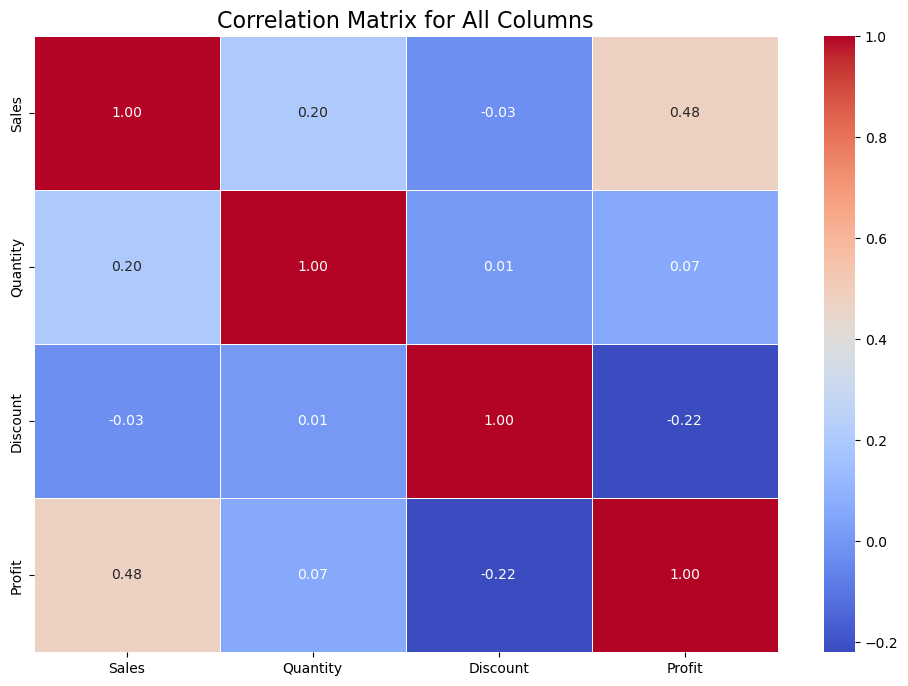

In [124]:
# Select numerical columns for correlation analysis (including encoded categorical columns)
correlation_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for selected columns
correlation_matrix = df[correlation_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for All Columns", fontsize=16)
plt.show()

**`Result:`**

Higher sales generally lead to higher profits, while discounts have a slight negative impact on profits and minimal effect on sales and quantity.

**Check how discount impact negatively to the profit & sales**

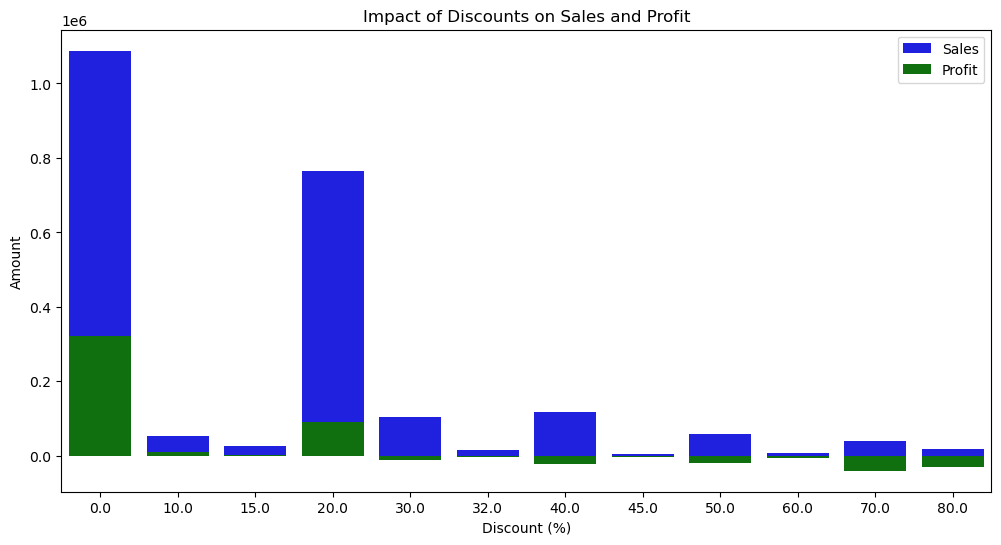

In [234]:
# Analyzing the impact of discounts on sales and profit 
discount_sales_profit = df.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Convert discount values to percentage format
discount_sales_profit['Discount'] = discount_sales_profit['Discount'] * 100

# Visualizing the impact of discounts on sales and profit 
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Discount', y='Sales', data=discount_sales_profit, color='blue', label='Sales') 
sns.barplot(x='Discount', y='Profit', data=discount_sales_profit, color='green', label='Profit') 
plt.xlabel('Discount (%)') 
plt.ylabel('Amount') 
plt.title('Impact of Discounts on Sales and Profit') 
plt.legend() 
plt.show()

**`Result:`**

- Minimal Discounts: Maintaining low or no discounts supports higher sales and profits.
- Impact of High Discounts: Discounts above 20% reduce profit margins significantly.
- Optimal Balance: Strategic, moderate discounts can boost sales without heavily impacting profitability.

### 4.2. Sales & Profit Patterns
How Do Sales and Profit Behave Quarterly Over All Years?

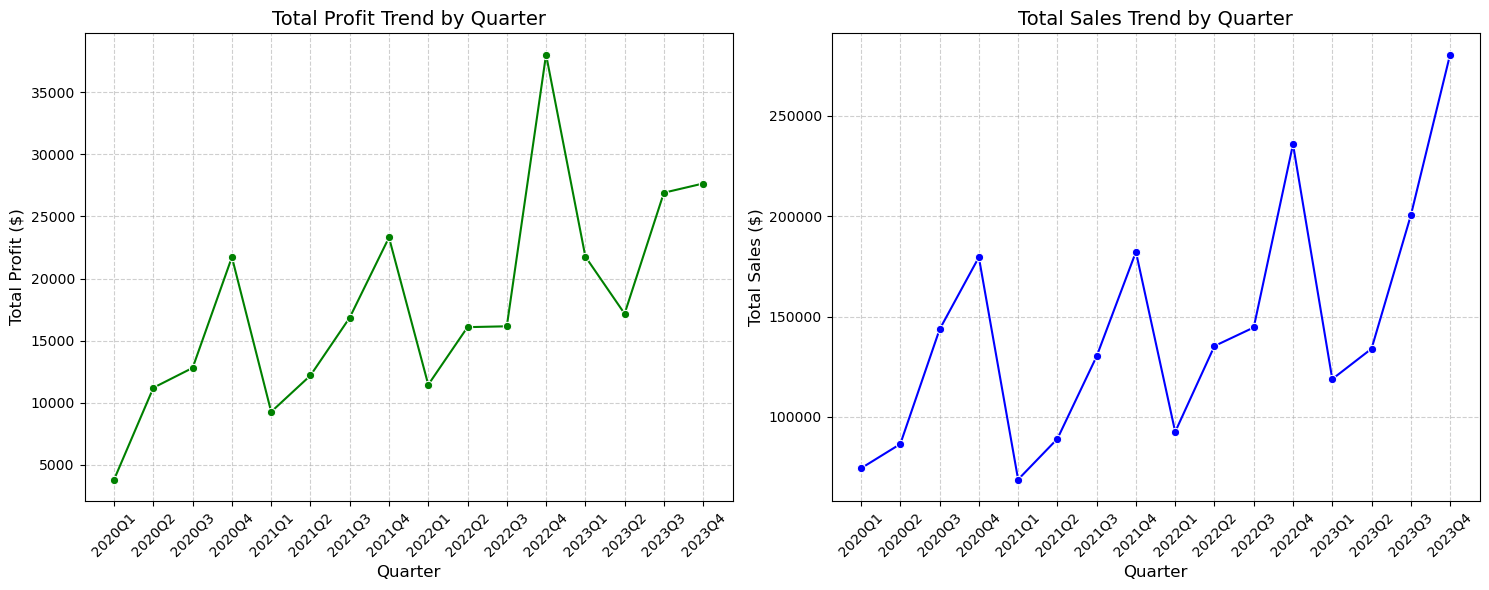

In [236]:
# Aggregate data by quarter
quarterly_data = df.groupby('Quarter').agg(
    Total_Profit=('Profit', 'sum'),
    Total_Sales=('Sales', 'sum')
).reset_index()

# Convert 'Quarter' to string for plotting
quarterly_data['Quarter'] = quarterly_data['Quarter'].astype(str)

# Create a figure with 2 subplots (one for Profit and one for Sales)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the profit trend in the first subplot
sns.lineplot(
    data=quarterly_data,
    x='Quarter',
    y='Total_Profit',
    marker='o',
    color='green',  # Green color for profit trend
    ax=axes[0]
)
axes[0].set_title('Total Profit Trend by Quarter', fontsize=14)
axes[0].set_xlabel('Quarter', fontsize=12)
axes[0].set_ylabel('Total Profit ($)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plotting the sales trend in the second subplot
sns.lineplot(
    data=quarterly_data,
    x='Quarter',
    y='Total_Sales',
    marker='o',
    color='blue',  # Blue color for sales trend
    ax=axes[1]
)
axes[1].set_title('Total Sales Trend by Quarter', fontsize=14)
axes[1].set_xlabel('Quarter', fontsize=12)
axes[1].set_ylabel('Total Sales ($)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

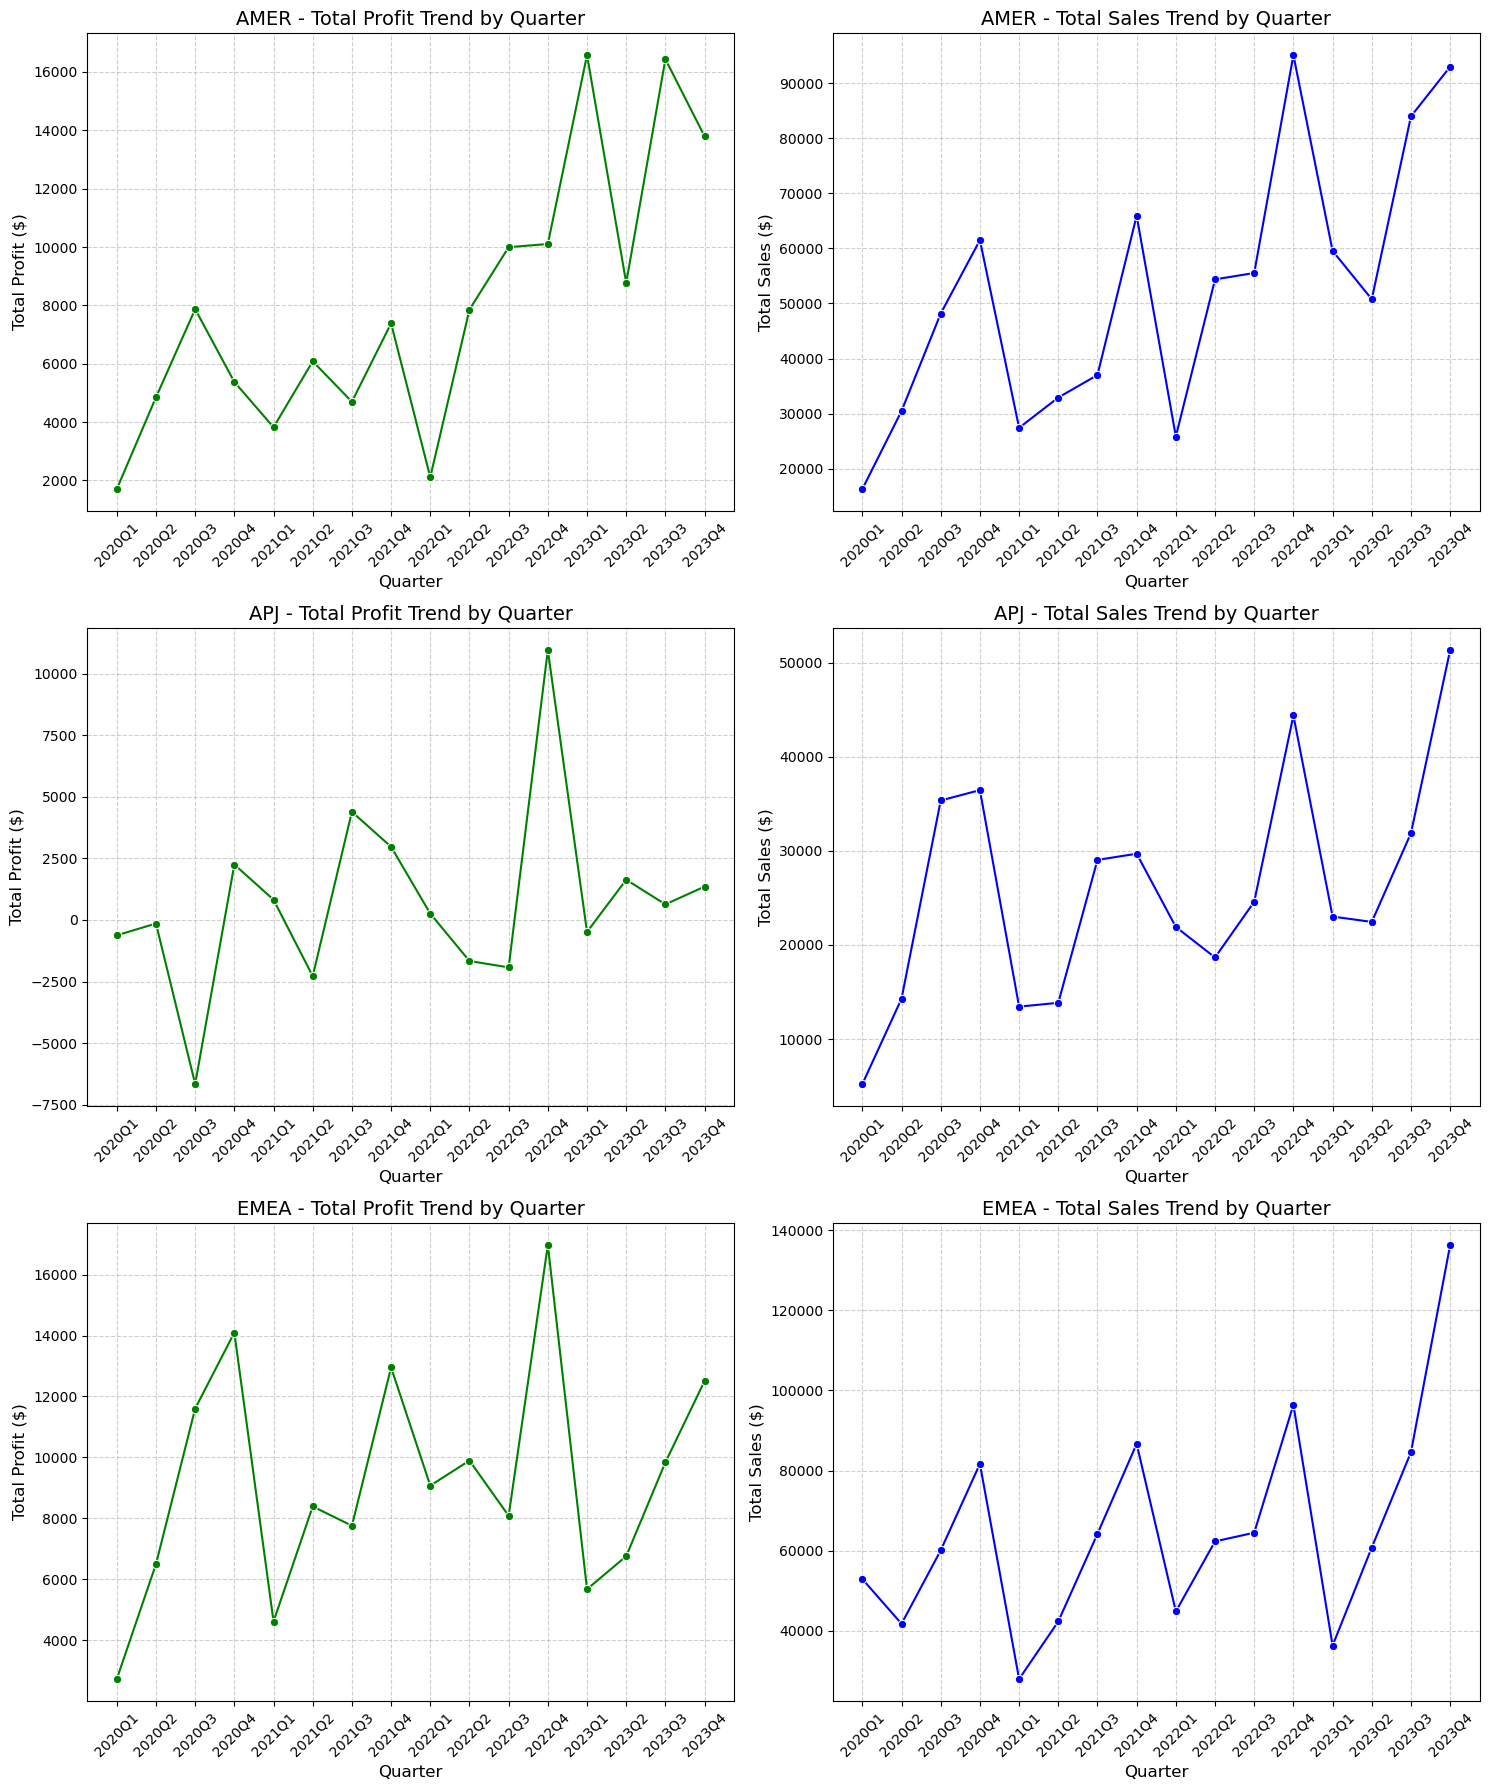

In [239]:
# Create a grid of subplots for each region
regions = regional_quarterly_data['Region'].unique()
fig, axes = plt.subplots(len(regions), 2, figsize=(15, 6 * len(regions)))

for i, region in enumerate(regions):
    region_data = regional_quarterly_data[regional_quarterly_data['Region'] == region]
    
    # Plotting the profit trend for each region
    sns.lineplot(
        data=region_data,
        x='Quarter',
        y='Total_Profit',
        marker='o',
        color='green',  # Green for profit trend
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'{region} - Total Profit Trend by Quarter', fontsize=14)
    axes[i, 0].set_xlabel('Quarter', fontsize=12)
    axes[i, 0].set_ylabel('Total Profit ($)', fontsize=12)
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].grid(True, linestyle='--', alpha=0.6)

    # Plotting the sales trend for each region
    sns.lineplot(
        data=region_data,
        x='Quarter',
        y='Total_Sales',
        marker='o',
        color='blue',  # Blue for sales trend
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'{region} - Total Sales Trend by Quarter', fontsize=14)
    axes[i, 1].set_xlabel('Quarter', fontsize=12)
    axes[i, 1].set_ylabel('Total Sales ($)', fontsize=12)
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [231]:
# Group the data by Region and Quarter, and calculate total Sales, Profit, and Discount
region_quarter_summary = (
    df.groupby(['Region', 'Quarter'])
      .agg(
          Total_Sales=('Sales', 'sum'),
          Total_Profit=('Profit', 'sum'),
          Total_Discount=('Discount', 'sum')  # Sum of all discounts for the group
      )
      .reset_index()
)

# Display the resulting DataFrames
print("Region-Quarter Summary:")
display(region_quarter_summary)

Region-Quarter Summary:


,Region,Quarter,Total_Sales,Total_Profit,Total_Discount
0,AMER,2020Q1,16301.2410,1704.2889,9.70
1,AMER,2020Q2,30474.3250,4848.4224,12.60
2,AMER,2020Q3,48175.5530,7870.0743,22.60
3,AMER,2020Q4,61499.4840,5374.0709,36.25
4,AMER,2021Q1,27422.1040,3823.1674,10.70
5,AMER,2021Q2,32914.5515,6081.1957,17.05
6,AMER,2021Q3,37007.6330,4696.4485,21.20
7,AMER,2021Q4,65927.2350,7383.4459,29.75
8,AMER,2022Q1,25837.4070,2111.3788,10.90
9,AMER,2022Q2,54371.0970,7855.7001,21.80


### Notable Data Patterns with Discounts

**High Profit, High Discount:**

 **2023Q1 (AMER):**

- **Total Sales:** 59,546.52
- **Total Profit:** 16,580.09
- **Total Discount:** 21.65

Despite offering substantial discounts, this quarter achieved high profit, indicating that the discount strategy might have effectively boosted sales volume without severely impacting profitability.

**Negative Profit with Significant Discounts:**

 **2020Q3 (APJ):**

- **Total Sales:** 35,341.69
- **Total Profit:** -6,667.36
- **Total Discount:** 33.42

High sales with significant discounts leading to negative profit, suggesting that discounts might have been too high or other costs were not managed well.

 **2021Q2 (APJ):**

- **Total Sales:** 13,847.52
- **Total Profit:** -2,282.96
- **Total Discount:** 31.00

Again, significant discounts contributing to negative profit, potentially indicating a need to re-evaluate the discount strategy.

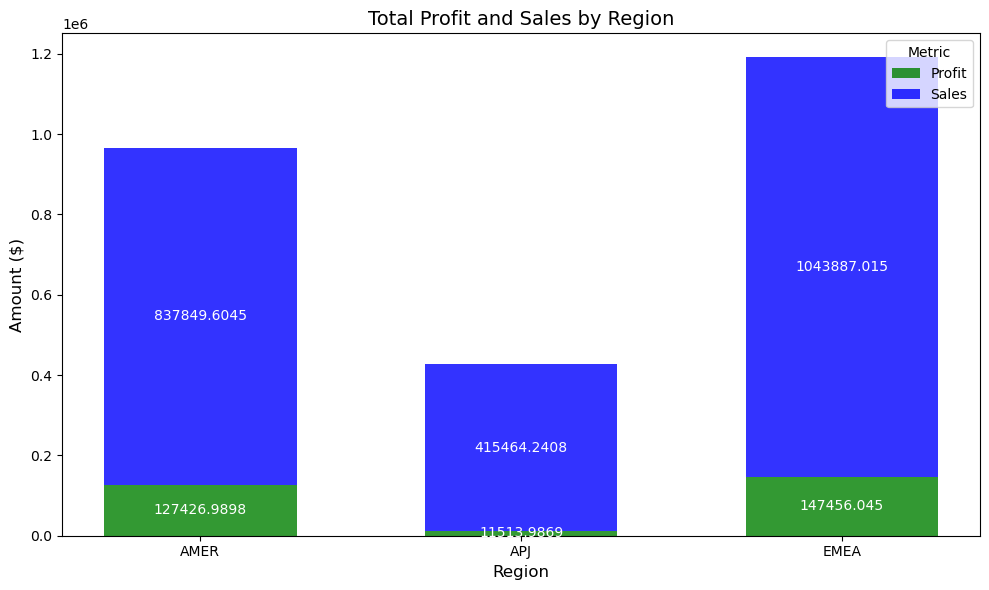

In [201]:
# Aggregate total profit and sales for each region
aggregated_data = df.groupby('Region').agg(
    Total_Profit=('Profit', 'sum'),
    Total_Sales=('Sales', 'sum')
).reset_index()

# Prepare data for plotting
regions = aggregated_data['Region']
profits = aggregated_data['Total_Profit']
sales = aggregated_data['Total_Sales']

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bars
bar_width = 0.6
ax.bar(regions, profits, label='Profit', color='green', alpha=0.8, width=bar_width)
ax.bar(regions, sales, bottom=profits, label='Sales', color='blue', alpha=0.8, width=bar_width)

# Add titles and labels
ax.set_title('Total Profit and Sales by Region', fontsize=14)
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Amount ($)', fontsize=12)
ax.legend(title='Metric', loc='upper right')

# Annotate bars with values
for i, (profit, sale) in enumerate(zip(profits, sales)):
    ax.text(i, profit / 2, f'{profit}', ha='center', va='center', color='white', fontsize=10)
    ax.text(i, profit + sale / 2, f'{sale}', ha='center', va='center', color='white', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**`Result:`**

There's a fluctuation pattern in overall.
- **High Peak** : Every Q4
- **Low Trough** : Every Q1

### 4.3. RFM Analysis
How Does RFM Analysis Help Us Create More Strategic and Segmented Customer Treatment?

**Calculate Recency, Frequency, and Monetary**

In [144]:
# Recency: How recently a customer made a purchase (latest purchase date)
recency = df.groupby('Customer')['Order Date'].max().reset_index()
recency['Recency'] = (df['Order Date'].max() - recency['Order Date']).dt.days

# Frequency: How many times a customer has made a purchase
frequency = df.groupby('Customer')['Order ID'].count().reset_index()
frequency['Frequency'] = frequency['Order ID']

# Monetary: How much profit the customer has generated
monetary = df.groupby('Customer')['Profit'].sum().reset_index()
monetary['Monetary'] = monetary['Profit']

# Merging all data into a single dataframe
rfm_df = recency[['Customer', 'Recency']].merge(frequency[['Customer', 'Frequency']], on='Customer').merge(monetary[['Customer', 'Monetary']], on='Customer')

# Normalize the Recency, Frequency, and Monetary columns using quantiles (1-5 scale)
rfm_df['Recency_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=False, duplicates='drop') + 1
rfm_df['Frequency_Score'] = pd.qcut(rfm_df['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm_df['Monetary_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=False, duplicates='drop') + 1

# Calculate RFM Score by combining the individual scores
rfm_df['RFM_Score'] = rfm_df['Recency_Score'] + rfm_df['Frequency_Score'] + rfm_df['Monetary_Score']

# Define a function to assign RFM labels based on the RFM Score
def rfm_label(row):
    if row['Recency_Score'] >= 4 and row['Frequency_Score'] >= 4 and row['Monetary_Score'] >= 4:
        return 'Champions'
    elif row['Recency_Score'] >= 3 and row['Frequency_Score'] >= 3 and row['Monetary_Score'] >= 3:
        return 'Loyal Customers'
    elif row['Recency_Score'] <= 2 and row['Frequency_Score'] >= 2 and row['Monetary_Score'] >= 2:
        return 'At-Risk Customers'
    else:
        return 'New Customers'

# Apply the function to the dataframe to generate the 'RFM Label' column
rfm_df['RFM Label'] = rfm_df.apply(rfm_label, axis=1)

# Print the dataframe with the RFM Label and Score
columns=rfm_df[['Customer', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'RFM Label']]

display(rfm_df.head())
display(rfm_df.tail())

,Customer,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM Label
0,AT&T,9,151,4520.6641,3,5,4,12,Loyal Customers
1,Abbott Laboratories,12,67,2281.7391,3,1,3,7,New Customers
2,Aetna,21,153,3312.6698,4,5,4,13,Champions
3,Airbus,27,123,5593.3657,4,4,5,13,Champions
4,Allianz,1,192,5531.8834,1,5,5,11,At-Risk Customers


,Customer,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM Label
94,Volkswagen,21,134,4546.1910,4,4,4,12,Champions
95,Walgreens,14,68,-740.6747,4,2,1,7,New Customers
96,Walmart,20,115,3111.1277,4,4,4,12,Champions
97,Walt Disney,22,103,5786.8297,4,3,5,12,Loyal Customers
98,Wells Fargo,2,98,2341.1471,1,3,3,7,At-Risk Customers


**Percentage Distribution of RFM Labels using Pie Chart**

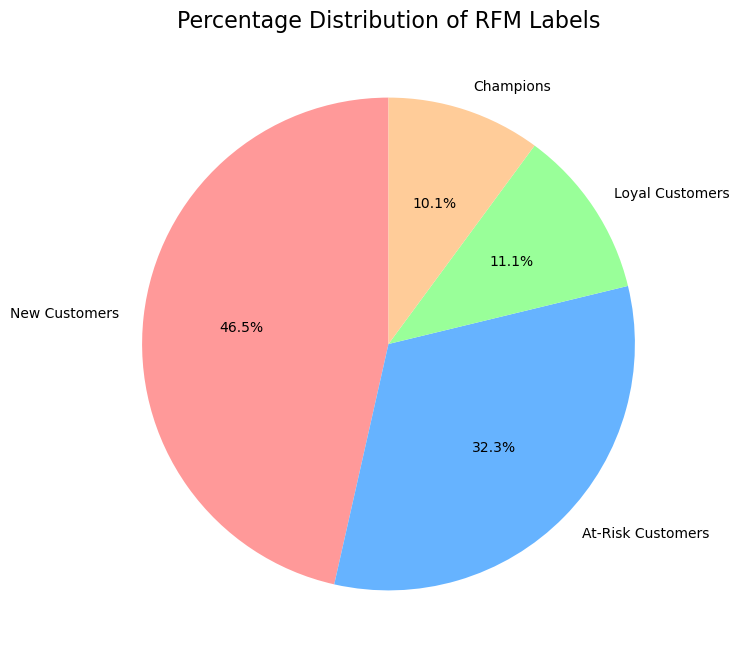

In [147]:
# Calculate the percentage of each RFM label
label_percentage = rfm_df['RFM Label'].value_counts() / len(rfm_df) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
label_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Percentage Distribution of RFM Labels', fontsize=16)
plt.ylabel('')
plt.show()

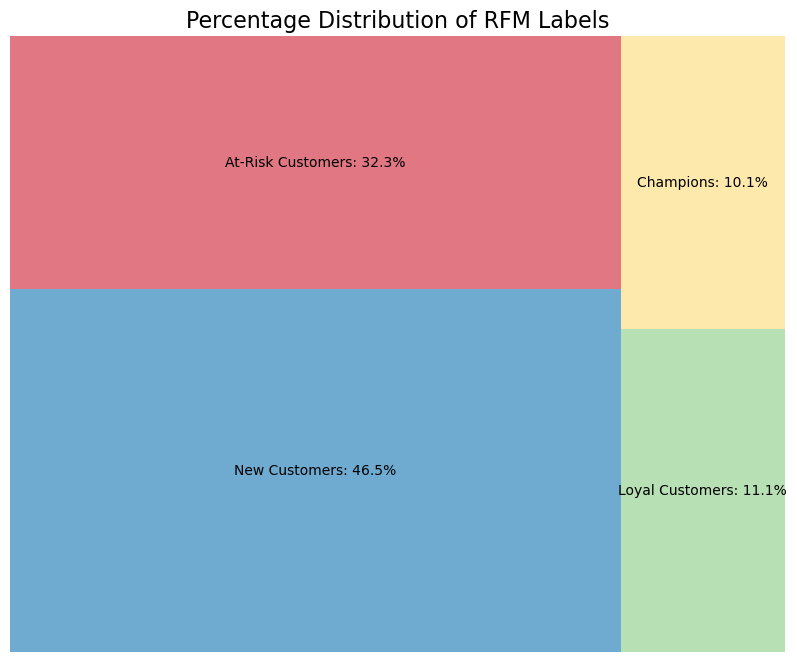

In [159]:
# Create a figure for the treemap
plt.figure(figsize=(10, 8))

# Generate labels with percentages for each RFM label
labels_with_percentage = [
    f"{label}: {percent:.1f}%" 
    for label, percent in zip(label_percentage.index, label_percentage.values)
]

# Plot the treemap
squarify.plot(
    sizes=label_percentage.values, 
    label=labels_with_percentage, 
    color=['#3288bd', '#d53e4f', '#99d594', '#fee08b'], 
    alpha=0.7
)

# Customize the plot
plt.title('Percentage Distribution of RFM Labels', fontsize=16)
plt.axis('off')  
plt.show()

**`Definition`**

**1. Champions: 10.1%**  
These are your most valuable customers. They have high frequency, recent purchases, and high monetary value. These customers are highly engaged with your product and are likely to recommend it to others.

**2. Loyal Customers: 11.1%**  
Customers who have a consistent history of purchasing or subscribing to your services, though not as frequently as Champions. They may not be your top spenders, but they are reliable and contribute steadily to revenue.

**3. At-Risk Customers: 32.3%**  
These customers have not engaged with your product in a while or have shown a decline in usage or purchases. It’s critical to identify and re-engage them before they churn.

**4. New Customers: 46.5%**  
Recently acquired customers who have made their first purchase or subscription. These customers need attention and nurturing to convert them into more frequent buyers or long-term subscribers.

***
## **5. Final Summarization**

### 5.1. Conclusion

The analysis of the AWS SaaS Sales Dataset has provided valuable insights into the sales performance, profitability, and customer behavior of the fictitious SaaS company. Key findings include:

1. **Profitability Trends**: High-profit customers exhibited varying performance over the years, with some showing significant volatility. For instance, Anthem experienced a peak in profits followed by a decline, while Johnson & Johnson maintained a more stable profit trajectory.

2. **Sales and Profit Patterns**:
   - Consistent high sales and profits in Q4, likely due to year-end spending.
   - Lower sales figures in Q1, suggesting a need for strategic planning to mitigate this dip.

3. **Impact of Discounts**: Discounts can drive sales, but excessive discounts (over 20%) negatively impact profit margins. A balanced discount strategy is essentia

4. **RFM Analysis**: Categorized customers into segments, highlighting the importance of targeting 'Champions' and 'Loyal Customers' for retention and addressing the needs of 'At-Risk Customers' to prevent churn.

### 5.2. Recommendation

Based on the findings from the analysis, the following recommendations are proposed:

1. **Customer Retention Strategies**: Develop targeted marketing campaigns for 'Champions' and 'Loyal Customers' to enhance engagement and encourage repeat purchases. Consider loyalty programs or exclusive offers to reward these segments.

2. **Re-engagement Initiatives**: Implement strategies to re-engage 'At-Risk Customers' through personalized communication, special promotions, or feedback requests to understand their needs and concerns.

3. **Sales Strategy Optimization**: Adjust sales strategies to account for seasonal fluctuations. Ramp up marketing efforts in Q1 to counteract the typical sales dip and maintain steady revenue.

4. **Discount Management**: Establish guidelines for discount offerings to ensure they are strategic and do not exceed thresholds that could harm profitability. Analyze the effectiveness of discounts regularly to optimize pricing strategies.

5. **Data-Driven Decision Making**: Continue leveraging data analytics to monitor customer behavior, sales trends, and profitability metrics. Regularly update the RFM analysis to adapt to changing customer dynamics and market conditions.

By implementing these recommendations, the company can enhance its sales performance, improve customer satisfaction, and ultimately drive profitability in the competitive SaaS market.